In [1]:
import pandas as pd
dataset = pd.read_csv("Ts-OHLC.csv")
dataset

,Open,High,Low,Close
0,1410.60,1427.90,1408.30,1415.10
1,1421.00,1626.60,1416.15,1607.40
2,1632.55,1673.90,1613.05,1626.20
3,1627.75,1627.75,1574.60,1579.05
4,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2220,202.90,207.80,201.35,205.00
2221,206.00,206.85,202.05,202.95
2222,203.90,203.90,199.35,201.00
2223,200.00,222.00,196.00,218.35


In [2]:
column = "Close"

In [3]:
from sklearn.preprocessing import MinMaxScaler
Ms=MinMaxScaler()
data1 = Ms.fit_transform(dataset[[column]])
print("Len:" , data1.shape)

Len: (2225, 1)


In [4]:
training_size = round(len(data1) * 0.95)
print(training_size)

X_train = data1[:training_size]
X_test = data1[training_size:]
print("X_train length:", X_train.shape)
print("X_test length:", X_test.shape)

y_train = data1[:training_size]
y_test = data1[training_size:]
print("y_train length:", y_train.shape)
print("y_test length:", y_test.shape)

2114
X_train length: (2114, 1)
X_test length: (111, 1)
y_train length: (2114, 1)
y_test length: (111, 1)


In [5]:
orders=[(1,1,1),(1,1,2),(2,3,1),(2,2,2)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data1, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)

C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


RMSE-Testset: 0.02288594565997708
maPe-Testset: 2377525502.620591


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


RMSE-Testset: 0.022885202880894368
maPe-Testset: 2415748899.181974
RMSE-Testset: 0.029668498489485426
maPe-Testset: 1993058418.3047612
RMSE-Testset: 0.02390705206041093
maPe-Testset: 2101158968.7326317


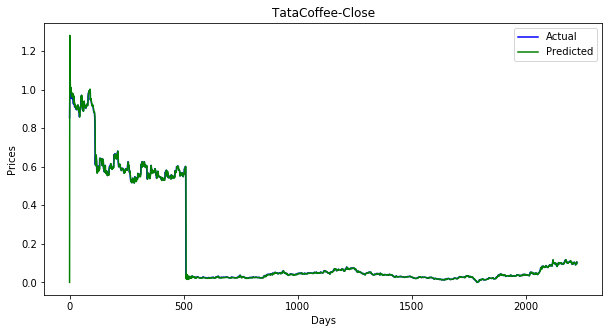

In [6]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","TataCoffee-Close","Days","Prices")

In [7]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [8]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

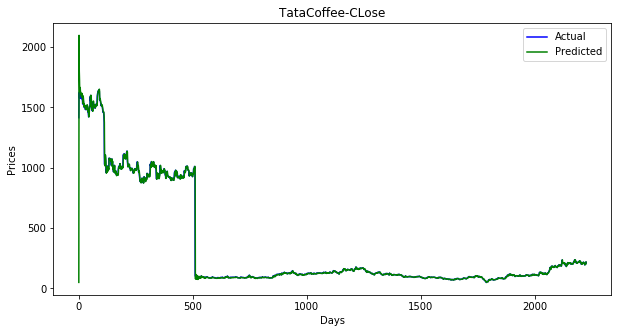

In [9]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-CLose","Days","Prices")

In [10]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 38.222594834184996
maPe-Testset: 0.022449597007654695


In [11]:
forecast=model_fit.predict(len(data1), len(data1)+200)

In [12]:
forecast

array([0.10218966, 0.1018375 , 0.10222174, 0.10191134, 0.10226263,
       0.1019839 , 0.10230505, 0.10205503, 0.10234884, 0.10212484,
       0.10239388, 0.10219347, 0.10244005, 0.10226102, 0.10248724,
       0.1023276 , 0.10253535, 0.1023933 , 0.10258431, 0.10245819,
       0.10263403, 0.10252236, 0.10268444, 0.10258588, 0.10273548,
       0.10264879, 0.10278709, 0.10271116, 0.10283921, 0.10277305,
       0.1028918 , 0.10283448, 0.10294482, 0.10289552, 0.10299821,
       0.10295619, 0.10305196, 0.10301653, 0.10310602, 0.10307656,
       0.10316036, 0.10313633, 0.10321497, 0.10319585, 0.10326981,
       0.10325514, 0.10332486, 0.10331423, 0.10338011, 0.10337314,
       0.10343553, 0.10343188, 0.10349111, 0.10349047, 0.10354684,
       0.10354892, 0.10360269, 0.10360725, 0.10365867, 0.10366547,
       0.10371475, 0.10372358, 0.10377093, 0.1037816 , 0.10382719,
       0.10383954, 0.10388354, 0.1038974 , 0.10393996, 0.10395519,
       0.10399644, 0.10401292, 0.10405299, 0.10407059, 0.10410

In [13]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [14]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [15]:
forecast_stock_price_test_oriF

,Closefore
0,212.780821
1,212.217802
2,212.832124
3,212.335848
4,212.897497
...,...
196,221.413237
197,221.45886
198,221.504562
199,221.550189
